# Task 1: Face Recognition using PCA and LDA

### Import Statements

In [1]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
from pca_lda_ae_helper import *

### Load the FacePix Dataset
* train_images and test_images are lists of np.ndarrays
* train_labels and test_labels are lists of ints
* All 4 lists should have equal length of 630

In [2]:
image_path = "/home/jo_wang/Desktop/ECE661/HW10/FaceRecognition"
train_images, train_labels, test_images, test_labels = load_face_data(image_path)
assert(len(train_images) == len(train_labels))
assert(len(test_images) == len(test_labels))
assert(len(train_images) == 630)
assert(len(test_images) == 630)

### Vectorize the Image
* vec_train_image and vec_test_image contain the vectorized images in one array
* their shapes are both (16384, 630)
* Each column of both np.ndarrays corresponds to a single image represented as a 1-D vector

In [3]:
vec_train_image = np.zeros((train_images[0].shape[0] * train_images[0].shape[1], len(train_images)), dtype=float)
vec_test_image = np.zeros((test_images[0].shape[0] * test_images[0].shape[1], len(test_images)), dtype=float)
assert(vec_train_image.shape == vec_test_image.shape)
assert(vec_train_image.shape == (16384, 630))

for i, image in enumerate(train_images):
    vec_train_image[:,i] = image.flatten()

for i, image in enumerate(test_images):
    vec_test_image[:,i] = image.flatten()


### Normalize the Image Vectors
1. Subtract the mean
2. Divide by the standard deviation

In [4]:
train_mean = np.mean(vec_train_image, axis=1)
vec_train_image = vec_train_image - train_mean.reshape(16384,1)
vec_test_image = vec_test_image - train_mean.reshape(16384,1)

for i in range(vec_train_image.shape[1]):
    vec_train_image[:,i] = vec_train_image[:,i] / np.linalg.norm(vec_train_image[:,i])
    vec_test_image[:,i] = vec_test_image[:,i] / np.linalg.norm(vec_test_image[:,i])

### Compute the Covariance Matrix
$C = XX^T$

In [ ]:
k_max = 30
accuracy_rate = list()

for k in tqdm(range(1,k_max)):
    _, _, u = np.linalg.svd(vec_train_image.T@vec_train_image)
    W = vec_train_image @ u.T

    W_k = W[:,:k]

    for i in range(W_k.shape[1]):
        W_k[:,i] = W_k[:,i] / np.linalg.norm(W_k[:,i])

    W_k_mean = np.mean(W_k, axis=1).reshape(-1,1)
    y_train = W_k.T @ (vec_train_image - W_k_mean)
    y_train = y_train.T

    y_test = W_k.T @ (vec_test_image - W_k_mean)
    y_test = y_test.T

    assert(y_train.shape == y_test.shape)

    y_train_list = [y_train[i,:] for i in range(y_train.shape[0])]
    y_test_list = [y_test[i,:] for i in range(y_test.shape[0])]
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(y_train_list, train_labels)
    pred = knn.predict(y_test_list)

    error = np.mean(pred != test_labels)
    accuracy_rate.append(1-error)
    print(f'Dimension: {k} Accuracy: {1-error}')

Text(0, 0.5, 'Accuracy Rate')

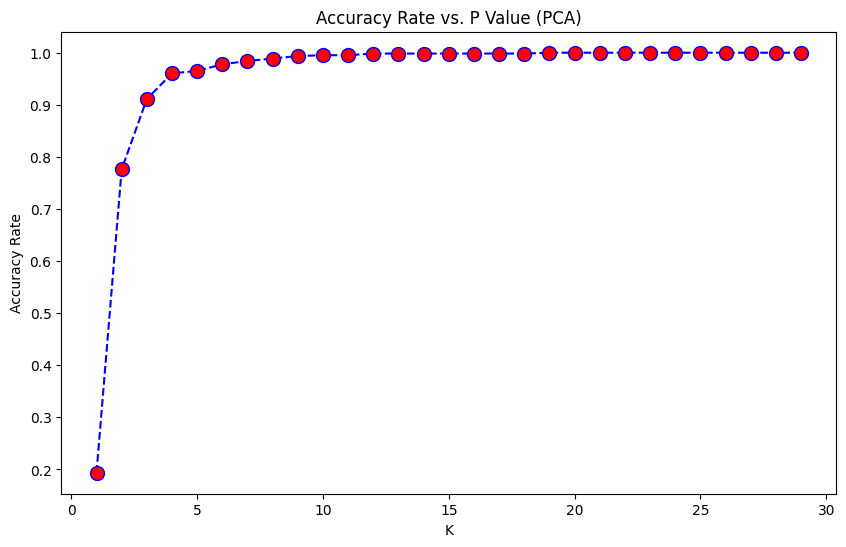

In [7]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 30), accuracy_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Accuracy Rate vs. P Value (PCA)')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')